In [1]:


import os
import sys
# This script sets up the Python path for a Jupyter notebook environment.
# It ensures that the project root directory is included in the Python path
# so that modules can be imported correctly.
notebook_dir = os.path.dirname(os.path.abspath('__file__'))

# Construct the path to the project root (one level up from 'notebooks' folder)
project_root = os.path.join(notebook_dir, '..')

# Add the project root to sys.path
sys.path.append(project_root)

# Import Libraries

In [2]:
# notebooks 01_EDA_01.ipynb
# -*- coding: utf-8 -*-
"""
This script performs exploratory data analysis (EDA) on a dataset of tweets.
# It includes loading the dataset, cleaning the text, visualizing tweet counts by language,
# and analyzing the most common words in the tweets.
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import os # Import os for path joining
import string
import nltk # import nltk for text processing

In [3]:

print("\n--- NLTK Data Path ---")
print("NLTK data paths being searched:")
for p in nltk.data.path:
    print(f"- {p}")

try:
    punkt_path = nltk.data.find('tokenizers/punkt')
    print(f"\nPunkt tokenizer found at: {punkt_path}")
except LookupError:
    print("\nPunkt tokenizer NOT found in expected paths by nltk.data.find().")
    print("This indicates a potential issue with NLTK's data location.")
print("--- End NLTK Diagnostic ---")




--- NLTK Data Path ---
NLTK data paths being searched:
- C:\Users\hp/nltk_data
- c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction\.venv\nltk_data
- c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction\.venv\share\nltk_data
- c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction\.venv\lib\nltk_data
- C:\Users\hp\AppData\Roaming\nltk_data
- C:\nltk_data
- D:\nltk_data
- E:\nltk_data

Punkt tokenizer found at: C:\Users\hp\AppData\Roaming\nltk_data\tokenizers\punkt
--- End NLTK Diagnostic ---


**Import Functions**

In [4]:
# Import functions/constants from src folder.
from src.data_loader import load_news_data, load_all_stock_data
from src.config import N_TOP_PUBLISHERS, EDA_OUTPUT_DIR, STOCK_TICKERS

Project structure setup complete and config.py created/updated.
Base Directory: c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction
News Raw Path: c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction\data\raw_analyst_ratings.csv
Stock Data Directory: c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction\data\yfinance_data
Tickers to process: ['AAPL', 'AMZN', 'GOOG', 'META', 'NVDA', 'TSLA']


In [5]:
# Set display options for pandas
pd.set_option('display.max_columns', None) # Show all columns in DataFrame
pd.set_option('display.width', 1000) # Set display width for DataFrame output

# Load Data 

In [6]:
# --- Data Loading ---
print("--- Loading Data ---")
news_df = load_news_data()
all_stock_dfs = load_all_stock_data()


--- Loading Data ---
Successfully loaded news data from: c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction\data\raw_analyst_ratings.csv
News data shape: (1407328, 6)
Successfully loaded stock data for AAPL from: c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction\data\yfinance_data\AAPL_historical_data.csv
  Shape: (10998, 8)
Successfully loaded stock data for AMZN from: c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction\data\yfinance_data\AMZN_historical_data.csv
  Shape: (6846, 8)
Successfully loaded stock data for GOOG from: c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction\data\yfinance_data\GOOG_historical_data.csv
  Shape: (5020, 8)
Successfully loaded stock data for META from: c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction\data\yfinance_data\META_historical_data.csv
  Shape: (2926, 8)
Successfully loaded stock data for NVDA from: c

#  EDA for News Data 

In [7]:
if news_df is None:
    print("Cannot proceed with News EDA as data loading failed.")
else:
    print("\n--- News Data Loading Complete ---")
    print("\nNews DataFrame Info:")
    news_df.info()


--- News Data Loading Complete ---

News DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


 ## 1. Descriptive Statistics 

In [8]:

print("\n## 1. Descriptive Statistics (Headline Length)")
print("Calculating headline lengths in characters and words...")

news_df['headline_length_chars'] = news_df['headline'].apply(len)
news_df['headline_length_words'] = news_df['headline'].apply(lambda x: len(str(x).split())) # Ensure string conversion

# Display the first few rows of the DataFrame with new columns
print("\n### Headline Length (Characters) Statistics:")
print(news_df['headline_length_chars'].describe())
print("\n### Headline Length (Words) Statistics:")
print(news_df['headline_length_words'].describe())


## 1. Descriptive Statistics (Headline Length)
Calculating headline lengths in characters and words...

### Headline Length (Characters) Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length_chars, dtype: float64

### Headline Length (Words) Statistics:
count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_length_words, dtype: float64


**Visualizing Distribution**


Visualizing Headline Length Distribution in characters..

Visualizing Headline Length Distribution in Words...


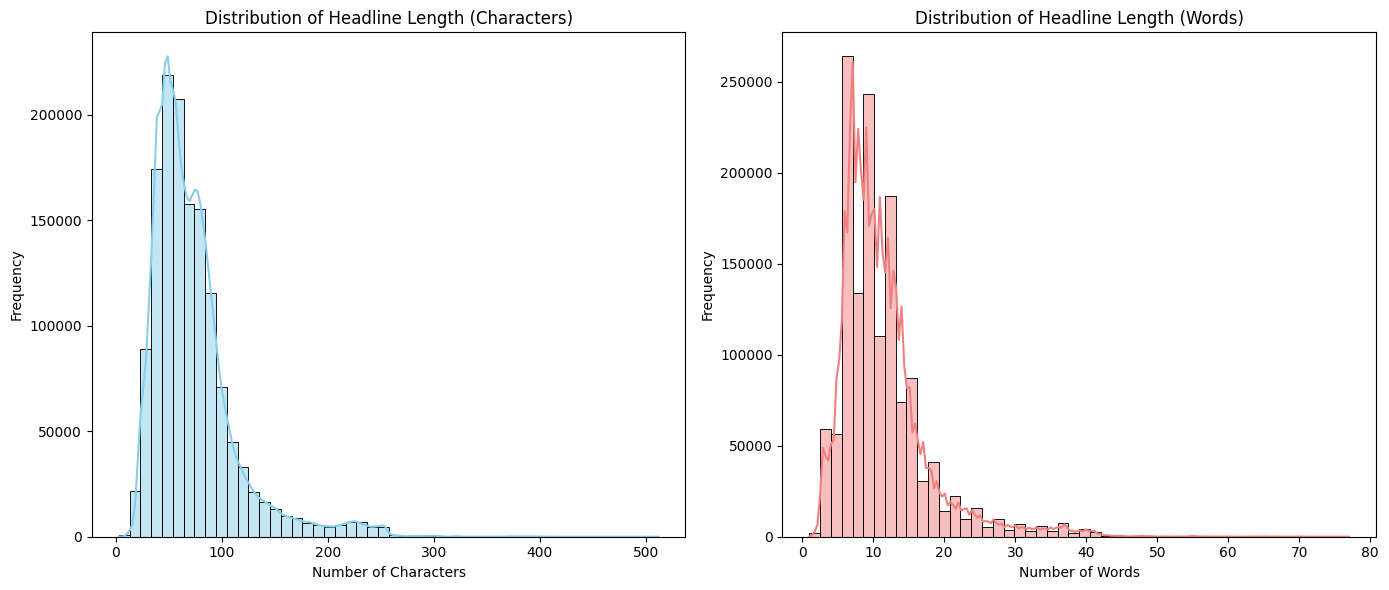

Saved: headline_length_distribution.png


In [9]:
print("\nVisualizing Headline Length Distribution in characters..")
plt.figure(figsize=(14, 6)) # Adjusted figure size for better side-by-side view
plt.subplot(1, 2, 1)
sns.histplot(news_df['headline_length_chars'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Headline Length (Characters)')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

# Visualize the distribution of headline lengths in words
print("\nVisualizing Headline Length Distribution in Words...")
plt.subplot(1, 2, 2)
sns.histplot(news_df['headline_length_words'], bins=50, kde=True, color='lightcoral')
plt.title('Distribution of Headline Length (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.tight_layout()
# Save the plot to the EDA_OUTPUT_DIR
# Ensure EDA_OUTPUT_DIR exists
os.makedirs(EDA_OUTPUT_DIR, exist_ok=True)
plt.savefig(os.path.join(EDA_OUTPUT_DIR, 'headline_length_distribution.png'))
plt.show()
print("Saved: headline_length_distribution.png")

# 2. Publisher Analysis


## 2. Publisher Analysis (Top 20 Publishers)

### Top Publishers by Article Count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64

Visualizing Top 20 Publishers...


C:\Users\hp\AppData\Local\Temp\ipykernel_2484\651332027.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_counts.head(N_TOP_PUBLISHERS).values,


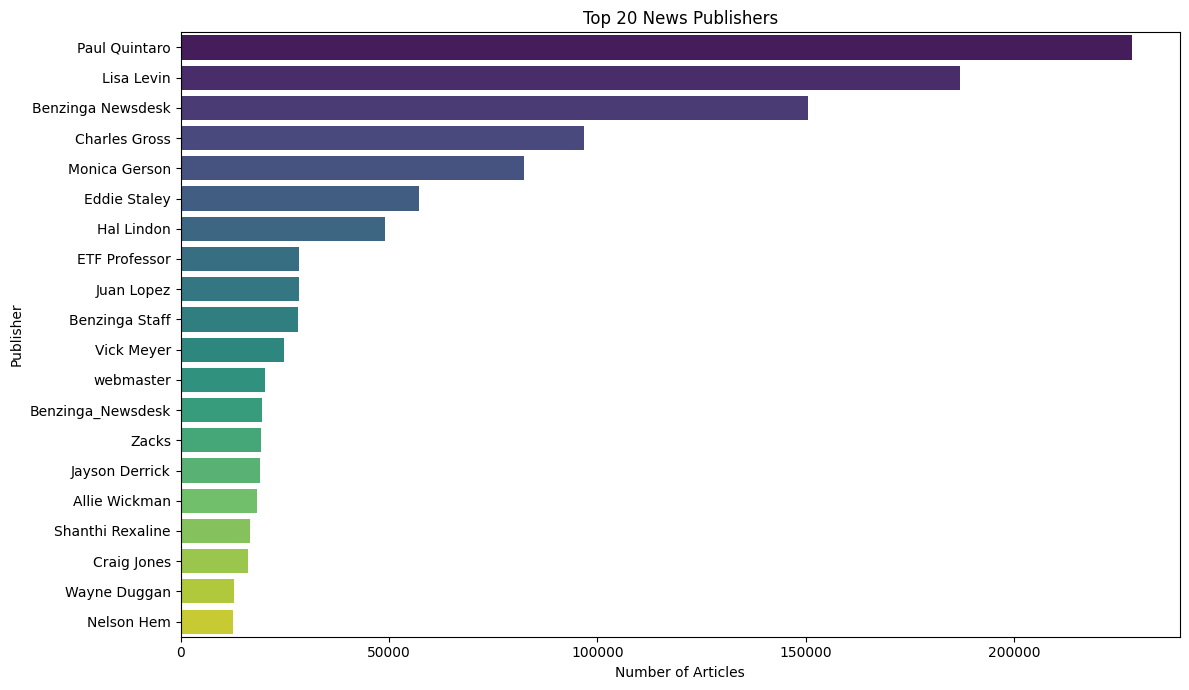

Saved: top_publishers.png

Attempting to extract domains from publisher names if they appear as email-like strings...


In [10]:

print(f"\n## 2. Publisher Analysis (Top {N_TOP_PUBLISHERS} Publishers)")
publisher_counts = news_df['publisher'].value_counts()
print("\n### Top Publishers by Article Count:")
print(publisher_counts.head(N_TOP_PUBLISHERS))

# Visualize the top N publishers
print(f"\nVisualizing Top {N_TOP_PUBLISHERS} Publishers...")
plt.figure(figsize=(12, 7))
sns.barplot(x=publisher_counts.head(N_TOP_PUBLISHERS).values,
                y=publisher_counts.head(N_TOP_PUBLISHERS).index,
                palette='viridis')
# Set the title and labels
plt.title(f'Top {N_TOP_PUBLISHERS} News Publishers')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.tight_layout()
plt.savefig(os.path.join(EDA_OUTPUT_DIR, 'top_publishers.png'))
plt.show()
print("Saved: top_publishers.png")
print("\nAttempting to extract domains from publisher names if they appear as email-like strings...")
def extract_domain(publisher_name):
        match = re.search(r'@([a-zA-Z0-9.-]+\.[a-zA-Z]{2,})', str(publisher_name))
        return match.group(1) if match else publisher_name # Return original if no domain found


### Top Publisher Domains by Article Count:
publisher_domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64

Visualizing Top 20 News Publisher Domains...


C:\Users\hp\AppData\Local\Temp\ipykernel_2484\4047460372.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=domain_counts.head(N_TOP_PUBLISHERS).values,


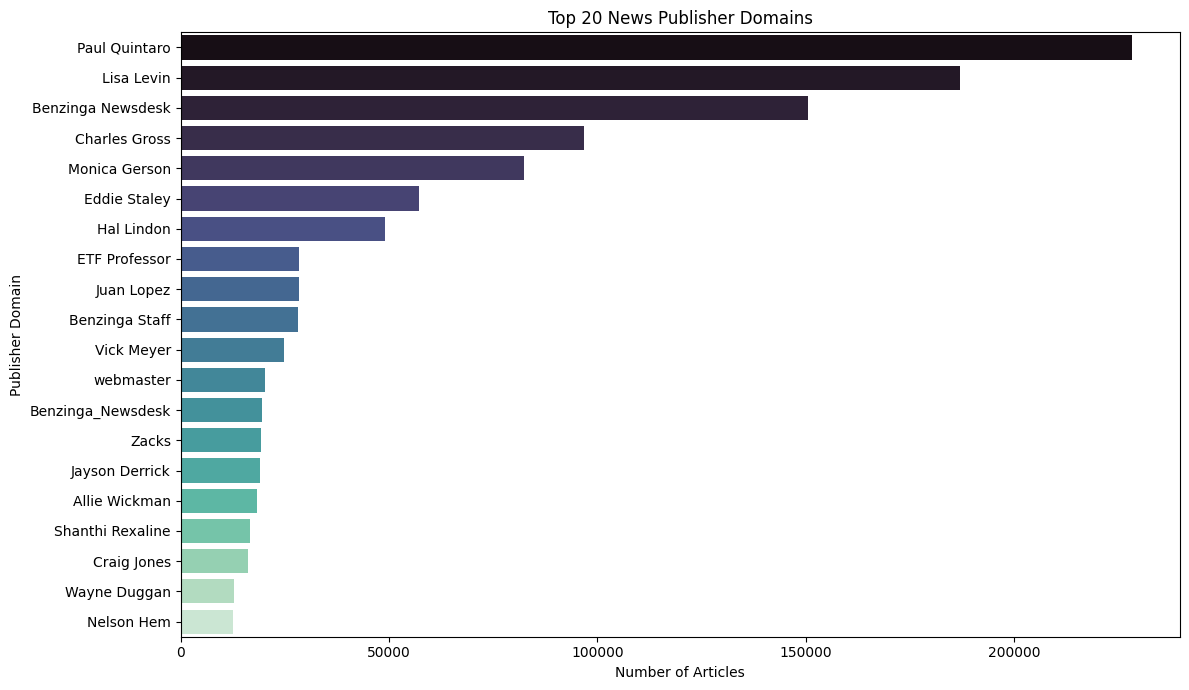

Saved: top_publisher_domains.png


In [11]:
# -*- coding: utf-8 -*-
# Check if 'publisher' column contains email-like addresses
if news_df['publisher'].astype(str).str.contains('@').any():
        news_df['publisher_domain'] = news_df['publisher'].apply(extract_domain)
        domain_counts = news_df['publisher_domain'].value_counts()
        print("\n### Top Publisher Domains by Article Count:")
        print(domain_counts.head(N_TOP_PUBLISHERS))

        print(f"\nVisualizing Top {N_TOP_PUBLISHERS} News Publisher Domains...")
        plt.figure(figsize=(12, 7))
        sns.barplot(x=domain_counts.head(N_TOP_PUBLISHERS).values,
                    y=domain_counts.head(N_TOP_PUBLISHERS).index,
                    palette='mako') # Changed palette for variety
        plt.title(f'Top {N_TOP_PUBLISHERS} News Publisher Domains')
        plt.xlabel('Number of Articles')
        plt.ylabel('Publisher Domain')
        plt.tight_layout()
        plt.savefig(os.path.join(EDA_OUTPUT_DIR, 'top_publisher_domains.png'))
        plt.show()
        print("Saved: top_publisher_domains.png")
else:
        print("No email-like addresses found in 'publisher' column, skipping domain extraction.")

# 3. Time Series Analysis


## 3. Time Series Analysis (News Data)
Converting 'date' column to datetime objects and analyzing news frequency...

### Daily News Publication Frequency:
2011-04-27 00:00:00-04:00    1
2011-04-28 00:00:00-04:00    2
2011-04-29 00:00:00-04:00    2
2011-04-30 00:00:00-04:00    1
2011-05-01 00:00:00-04:00    1
Freq: D, dtype: int64


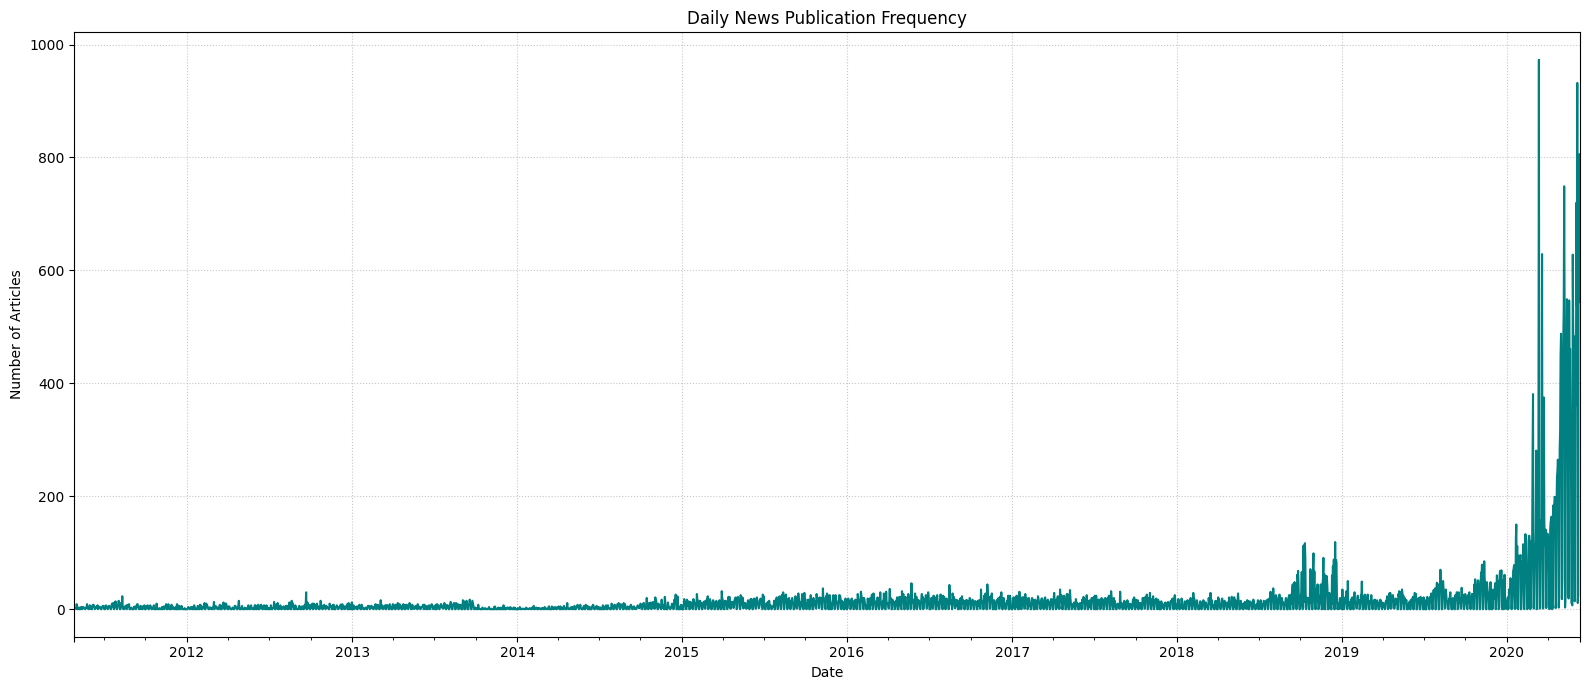

Saved: daily_news_frequency.png


In [12]:

print("\n## 3. Time Series Analysis (News Data)")
print("Converting 'date' column to datetime objects and analyzing news frequency...")
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')
news_df.dropna(subset=['date'], inplace=True) # Remove rows where date conversion failed

print("\n### Daily News Publication Frequency:")
daily_news_counts = news_df.set_index('date').resample('D').size()
    # Fill missing dates with 0 for a continuous plot
daily_news_counts = daily_news_counts.reindex(pd.date_range(start=daily_news_counts.index.min(),
                                                                end=daily_news_counts.index.max(),
                                                                freq='D'), fill_value=0)
print(daily_news_counts.head())

plt.figure(figsize=(16, 7)) # Increased figure size
daily_news_counts.plot(title='Daily News Publication Frequency', color='teal', linewidth=1.5)
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(EDA_OUTPUT_DIR, 'daily_news_frequency.png'))
plt.show()
print("Saved: daily_news_frequency.png")



### News Publication Frequency by Hour of Day:
hour_of_day
0       67
1       14
2       57
3       93
4     1469
5     1829
6     2476
7     5033
8     5527
9     5965
10    7669
11    5701
12    5732
13    2710
14    2075
15    1612
16    3939
17    2800
18     704
19     227
20     131
21      82
22      48
23      27
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_2484\1508497259.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_news_counts.index, y=hourly_news_counts.values, palette='plasma')


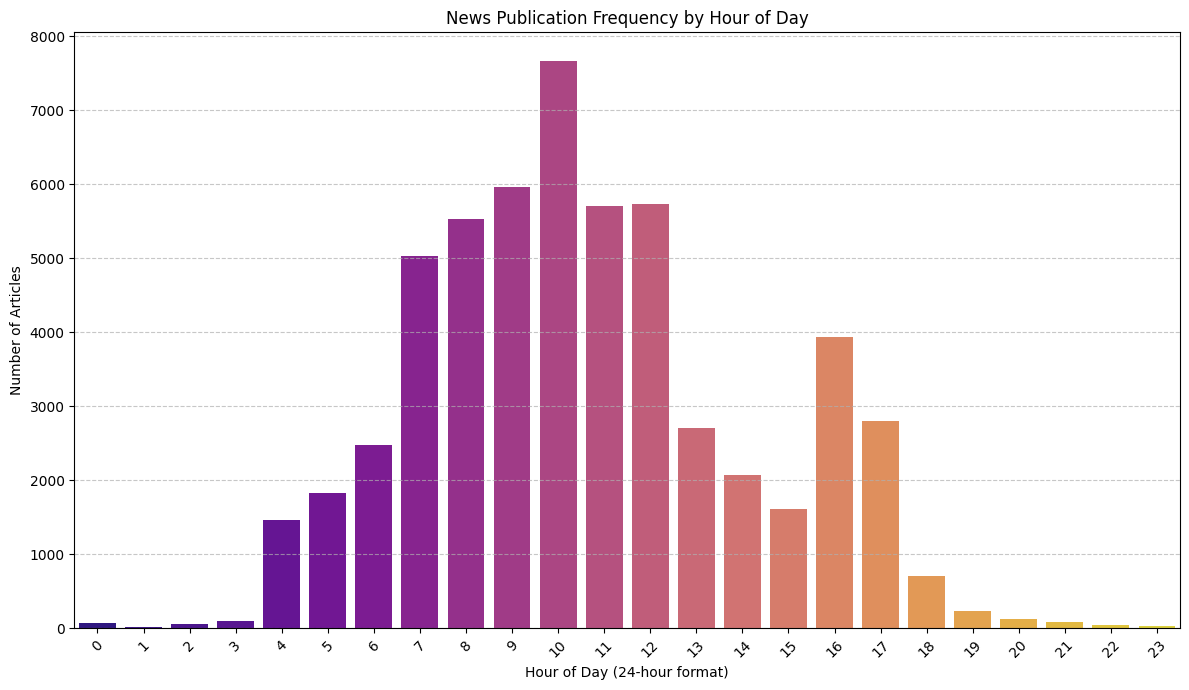

In [13]:
# -*- coding: utf-8 -*-
# Check if 'publisher' column contains email-like addresses
print("\n### News Publication Frequency by Hour of Day:")
news_df['hour_of_day'] = news_df['date'].dt.hour
hourly_news_counts = news_df['hour_of_day'].value_counts().sort_index()
print(hourly_news_counts)
# -*- coding: utf-8 -*-
# Visualize the hourly news publication frequency
plt.figure(figsize=(12, 7)) # Increased figure size
sns.barplot(x=hourly_news_counts.index, y=hourly_news_counts.values, palette='plasma')
plt.title('News Publication Frequency by Hour of Day') # <-- Separate this line
plt.xlabel('Hour of Day (24-hour format)') # <-- And put xlabel on its own line
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(EDA_OUTPUT_DIR, 'hourly_news_frequency.png'))
plt.show()

# 4. Text Analysis

In [ ]:
import nltk
print("Attempting to download NLTK 'stopwords'...")
nltk.download('stopwords')
print("Attempting to download NLTK 'punkt'...")
nltk.download('punkt')
print("NLTK data download attempt complete.")
import nltk
nltk.download('stopwords')

Attempting to download NLTK 'stopwords'...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


Attempting to download NLTK 'punkt'...
NLTK data download attempt complete.


[nltk_data]   Package punkt is already up-to-date!


In [15]:
print("\n## 4. Text Analysis (Common Keywords)")
print("Performing basic text preprocessing and identifying common unigrams, bigrams, and trigrams...")

    # NLTK data download check (now less critical as we downloaded it manually)
try:
        from nltk.corpus import stopwords
        from nltk.tokenize import word_tokenize
        from nltk.util import ngrams
        # No need for manual download attempts here if we already confirmed manual download
        _ = nltk.data.find('corpora/stopwords')
        _ = nltk.data.find('tokenizers/punkt')
except Exception as e:
        print(f"Error: NLTK resources not found despite previous steps. Please ensure 'stopwords' and 'punkt' are downloaded.")
        print("You can try running this in a separate cell: `import nltk; nltk.download('stopwords'); nltk.download('punkt')`")
        sys.exit("Exiting EDA due to missing NLTK data.") # Exit if critical data is missing

stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)


## 4. Text Analysis (Common Keywords)
Performing basic text preprocessing and identifying common unigrams, bigrams, and trigrams...


In [ ]:


def preprocess_text_for_eda(text):
        text = str(text).lower()
        # Remove URLs (if any exist in headlines)
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        text = ''.join(char for char in text if char not in punctuation)
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        return tokens

#Ensure 'headline' column is string type before applying preprocess_text_for_eda
news_df['processed_headline'] = news_df['headline'].astype(str).apply(preprocess_text_for_eda)

    # Get all words for unigram analysis
all_words = [word for tokens in news_df['processed_headline'] for word in tokens]
word_freq = Counter(all_words)
print("\n### Top 20 Most Common Words (Unigrams):")
for word, count in word_freq.most_common(20):
        print(f"- {word}: {count}")

    # Get bigrams
all_bigrams = []
for tokens in news_df['processed_headline']:
        all_bigrams.extend(list(ngrams(tokens, 2))) # ngrams(tokens, 3) for trigrams

bigram_freq = Counter(all_bigrams)
print("\n### Top 20 Most Common Bigrams:")
for bigram, count in bigram_freq.most_common(20):
        print(f"- {' '.join(bigram)}: {count}")

    # Get trigrams
all_trigrams = []
for tokens in news_df['processed_headline']:
        all_trigrams.extend(list(ngrams(tokens, 3)))
trigram_freq = Counter(all_trigrams)
print("\n### Top 20 Most Common Trigrams:")
for trigram, count in trigram_freq.most_common(20):
        print(f"- {' '.join(trigram)}: {count}")

else:
    print("News data not loaded. Skipping news data analysis.")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\hp/nltk_data'
    - 'c:\\Users\\hp\\OneDrive\\Desktop\\kaim-ai\\KAIM-1\\NewsSentiment-StockPrice-Prediction\\.venv\\nltk_data'
    - 'c:\\Users\\hp\\OneDrive\\Desktop\\kaim-ai\\KAIM-1\\NewsSentiment-StockPrice-Prediction\\.venv\\share\\nltk_data'
    - 'c:\\Users\\hp\\OneDrive\\Desktop\\kaim-ai\\KAIM-1\\NewsSentiment-StockPrice-Prediction\\.venv\\lib\\nltk_data'
    - 'C:\\Users\\hp\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


# EDA for Stock data


--- Stock Data Analysis for All Tickers ---

## Analyzing AAPL Stock Data
### AAPL Data Descriptive Statistics:
               Open          High           Low         Close     Adj Close        Volume     Dividends  Stock Splits
count  10998.000000  10998.000000  10998.000000  10998.000000  10998.000000  1.099800e+04  10998.000000  10998.000000
mean      22.299160     22.539055     22.068367     22.312754     21.494496  3.180806e+08      0.000752      0.001546
std       46.003685     46.496031     45.540929     46.037660     45.561916  3.354523e+08      0.011753      0.083663
min        0.049665      0.049665      0.049107      0.049107      0.037857  0.000000e+00      0.000000      0.000000
25%        0.299107      0.303710      0.290179      0.298549      0.241840  1.132545e+08      0.000000      0.000000
50%        0.531250      0.537946      0.522321      0.531250      0.432079  2.057412e+08      0.000000      0.000000
75%       20.204196     20.389554     19.998036     20.196160

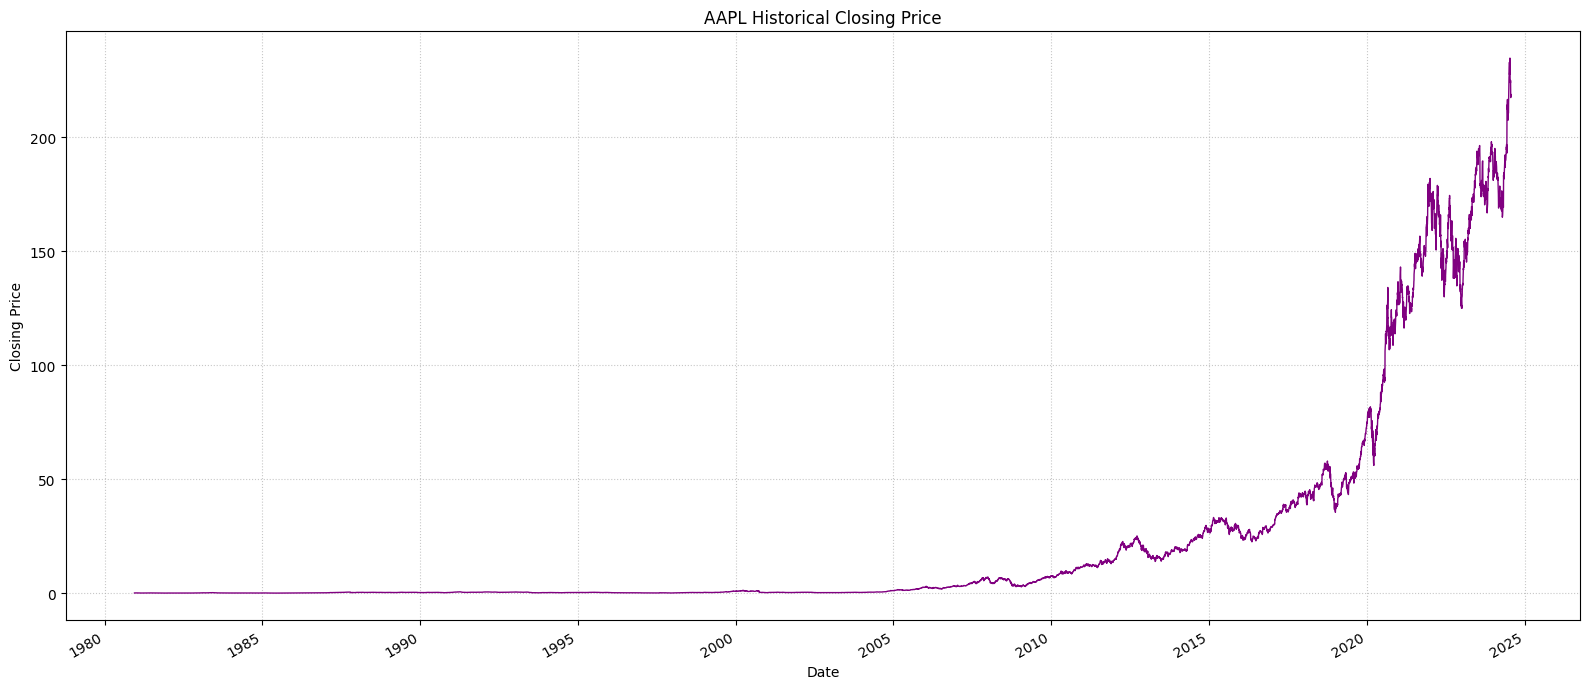

Saved: AAPL_closing_price.png

Plotting AAPL Daily Trading Volume...


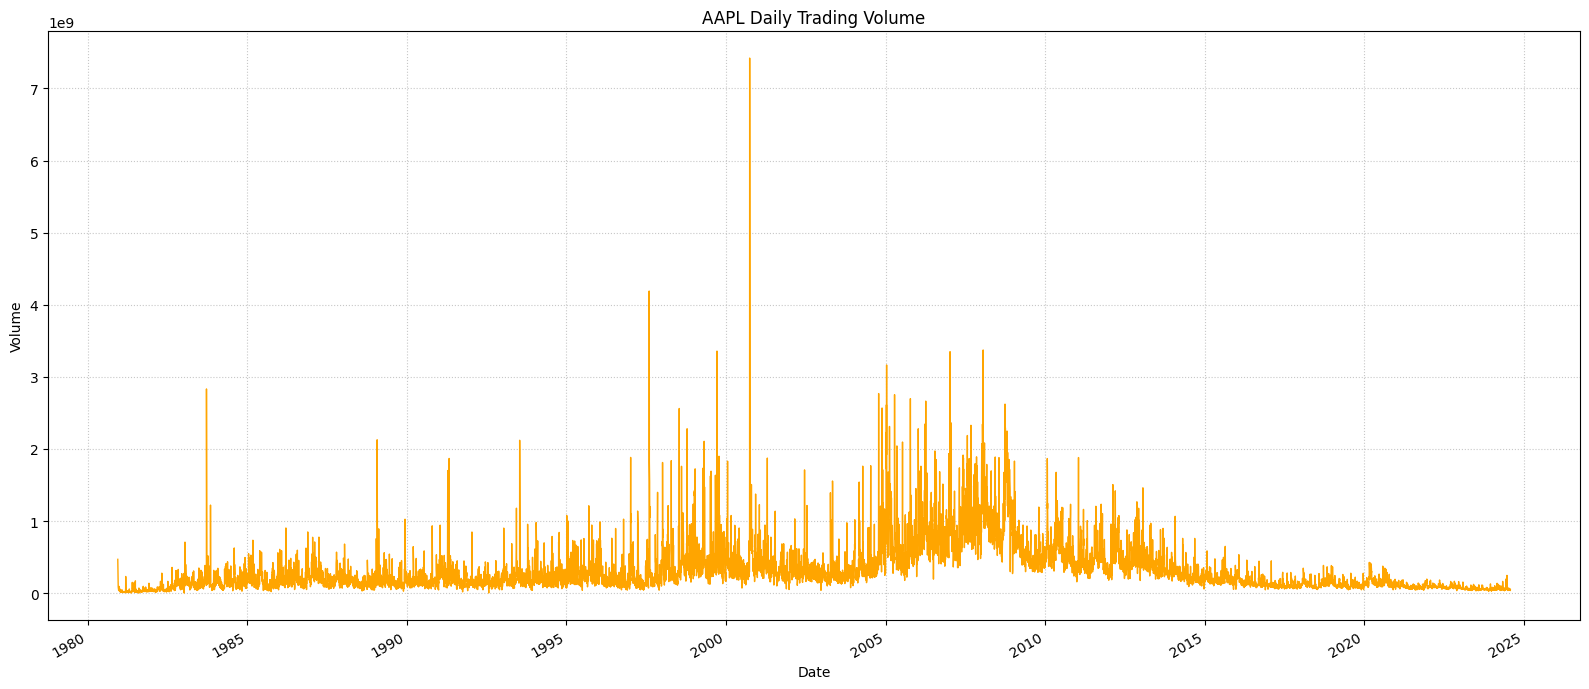

Saved: AAPL_trading_volume.png

### AAPL Daily Returns Statistics:
count    10997.000000
mean         0.001096
std          0.027892
min         -0.518692
25%         -0.012674
50%          0.000000
75%          0.014451
max          0.332281
Name: Daily_Return, dtype: float64

Plotting AAPL Daily Returns...


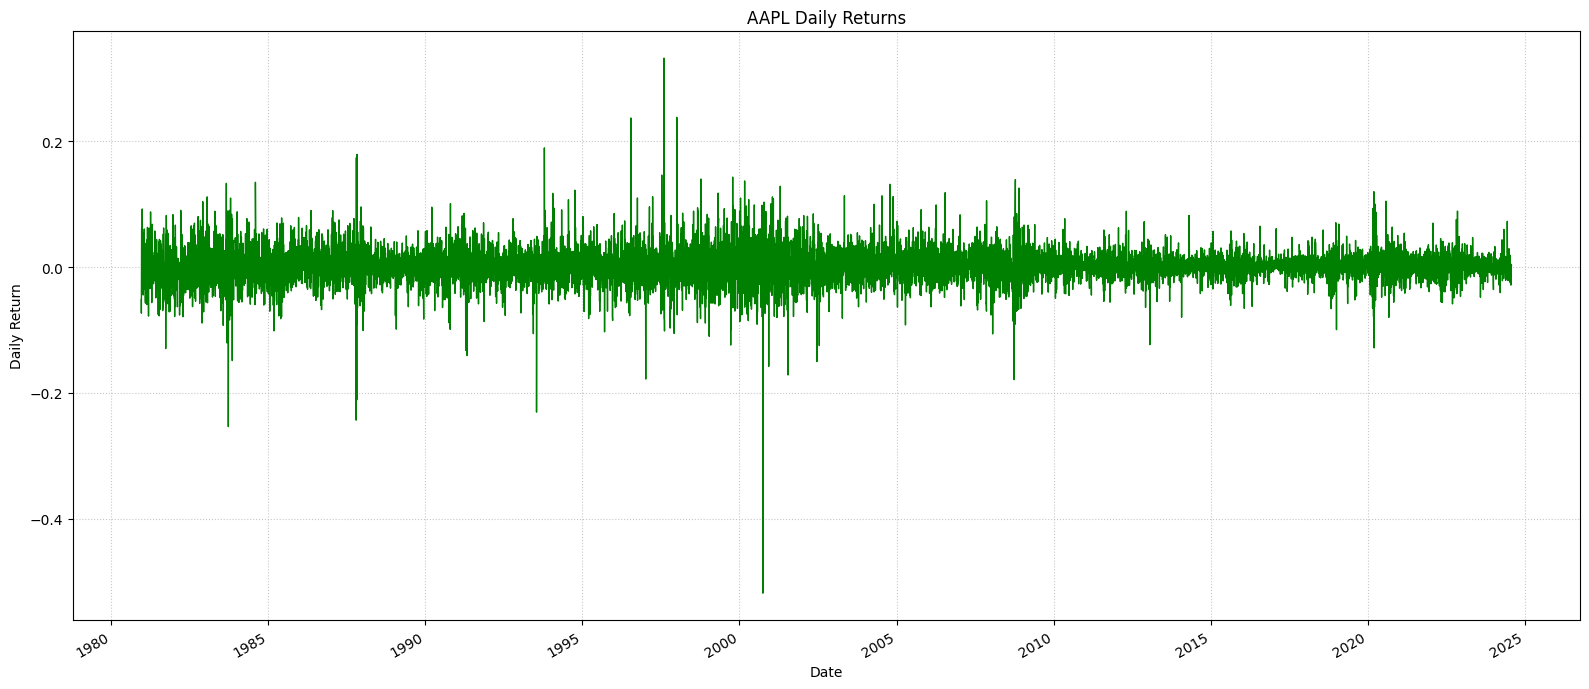

Saved: AAPL_daily_returns.png

## Analyzing AMZN Stock Data
### AMZN Data Descriptive Statistics:
              Open         High          Low        Close    Adj Close        Volume  Dividends  Stock Splits
count  6846.000000  6846.000000  6846.000000  6846.000000  6846.000000  6.846000e+03     6846.0   6846.000000
mean     37.360464    37.801009    36.882561    37.351096    37.351096  1.380713e+08        0.0      0.003944
std      53.756955    54.366449    53.087051    53.729913    53.729913  1.382346e+08        0.0      0.246789
min       0.070313     0.072396     0.065625     0.069792     0.069792  9.744000e+06        0.0      0.000000
25%       2.070125     2.120625     2.040156     2.076750     2.076750  6.505442e+07        0.0      0.000000
50%       8.574500     8.666750     8.466500     8.591500     8.591500  1.020650e+08        0.0      0.000000
75%      50.453876    50.723249    50.059875    50.426500    50.426500  1.567560e+08        0.0      0.000000
max     200.089996   2

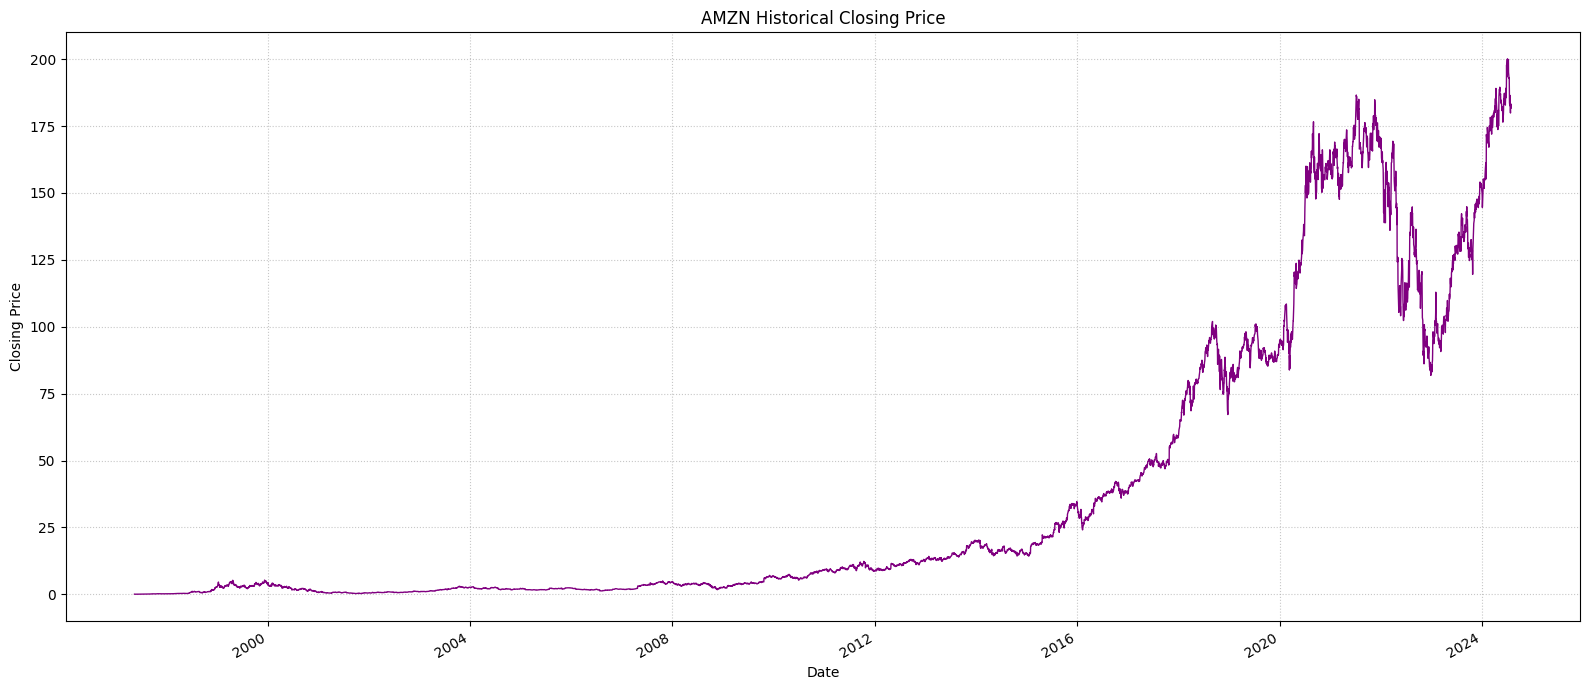

Saved: AMZN_closing_price.png

Plotting AMZN Daily Trading Volume...


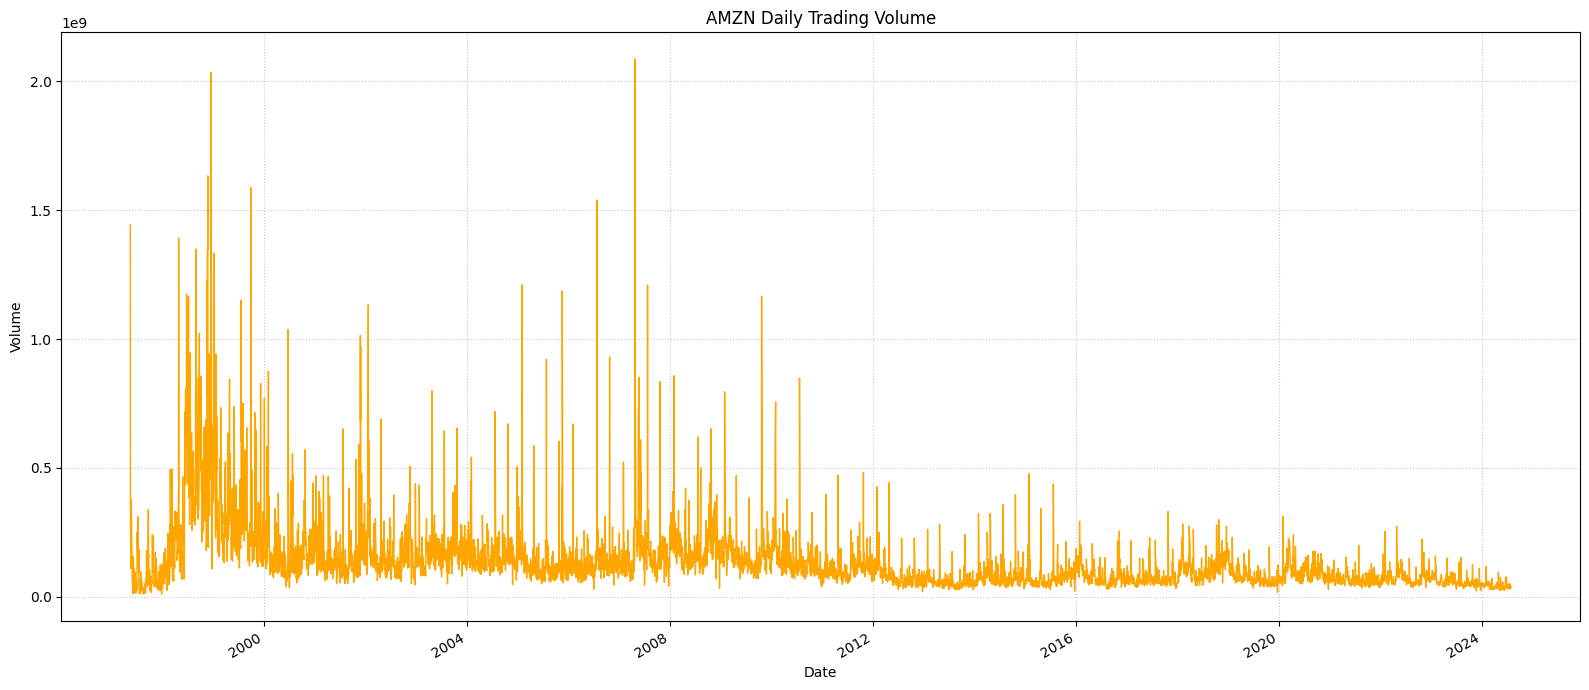

Saved: AMZN_trading_volume.png

### AMZN Daily Returns Statistics:
count    6845.000000
mean        0.001716
std         0.035429
min        -0.247661
25%        -0.013028
50%         0.000409
75%         0.014671
max         0.344714
Name: Daily_Return, dtype: float64

Plotting AMZN Daily Returns...


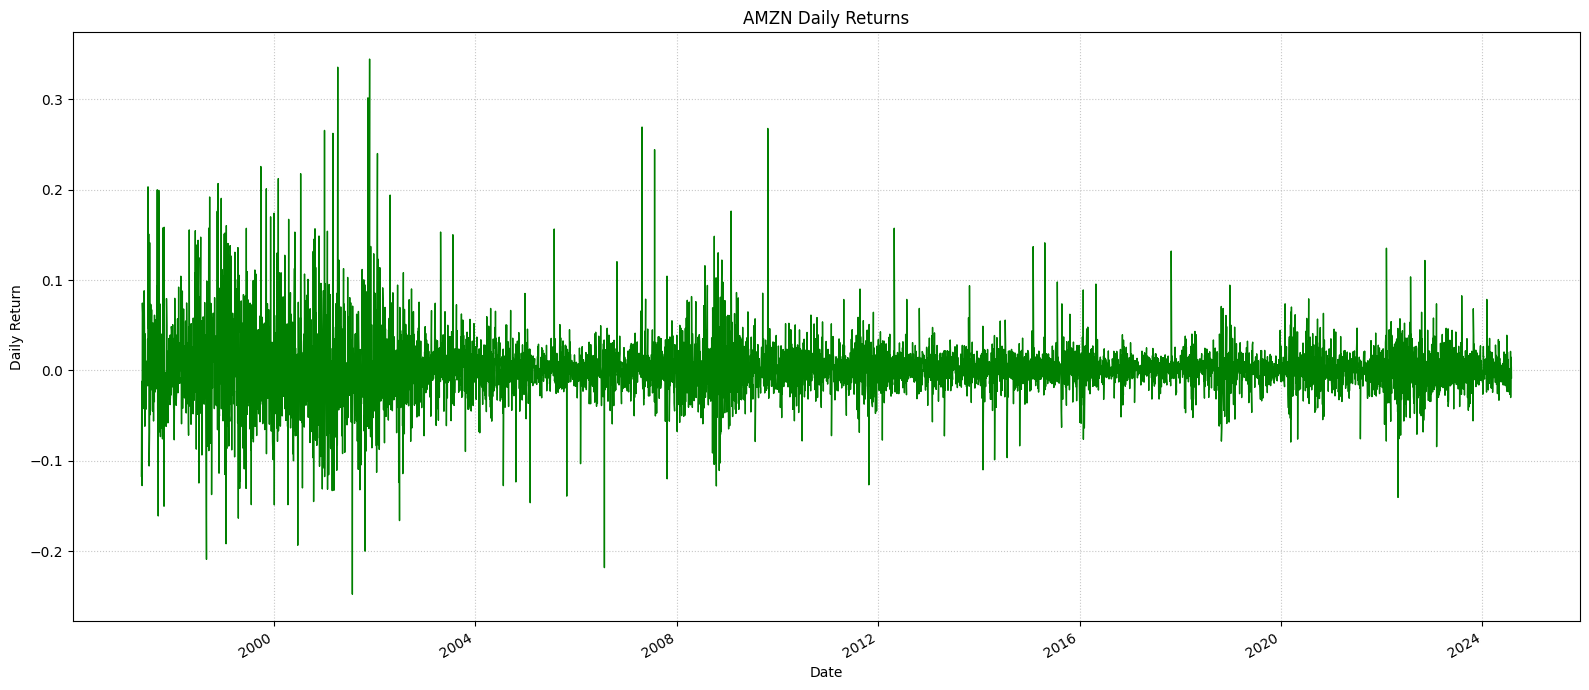

Saved: AMZN_daily_returns.png

## Analyzing GOOG Stock Data
### GOOG Data Descriptive Statistics:
              Open         High          Low        Close    Adj Close        Volume    Dividends  Stock Splits
count  5020.000000  5020.000000  5020.000000  5020.000000  5020.000000  5.020000e+03  5020.000000   5020.000000
mean     45.251315    45.728793    44.800587    45.274515    45.224493  1.157539e+08     0.000040      0.004583
std      43.338635    43.818298    42.918167    43.377299    43.332534  1.497936e+08     0.002823      0.284034
min       2.470490     2.534002     2.390042     2.490913     2.488082  1.584340e+05     0.000000      0.000000
25%      13.034705    13.145415    12.881592    13.032090    13.017277  2.733950e+07     0.000000      0.000000
50%      26.982210    27.194902    26.791387    27.005927    26.975230  5.585480e+07     0.000000      0.000000
75%      60.215126    60.758375    59.811811    60.280252    60.211734  1.425333e+08     0.000000      0.000000
max   

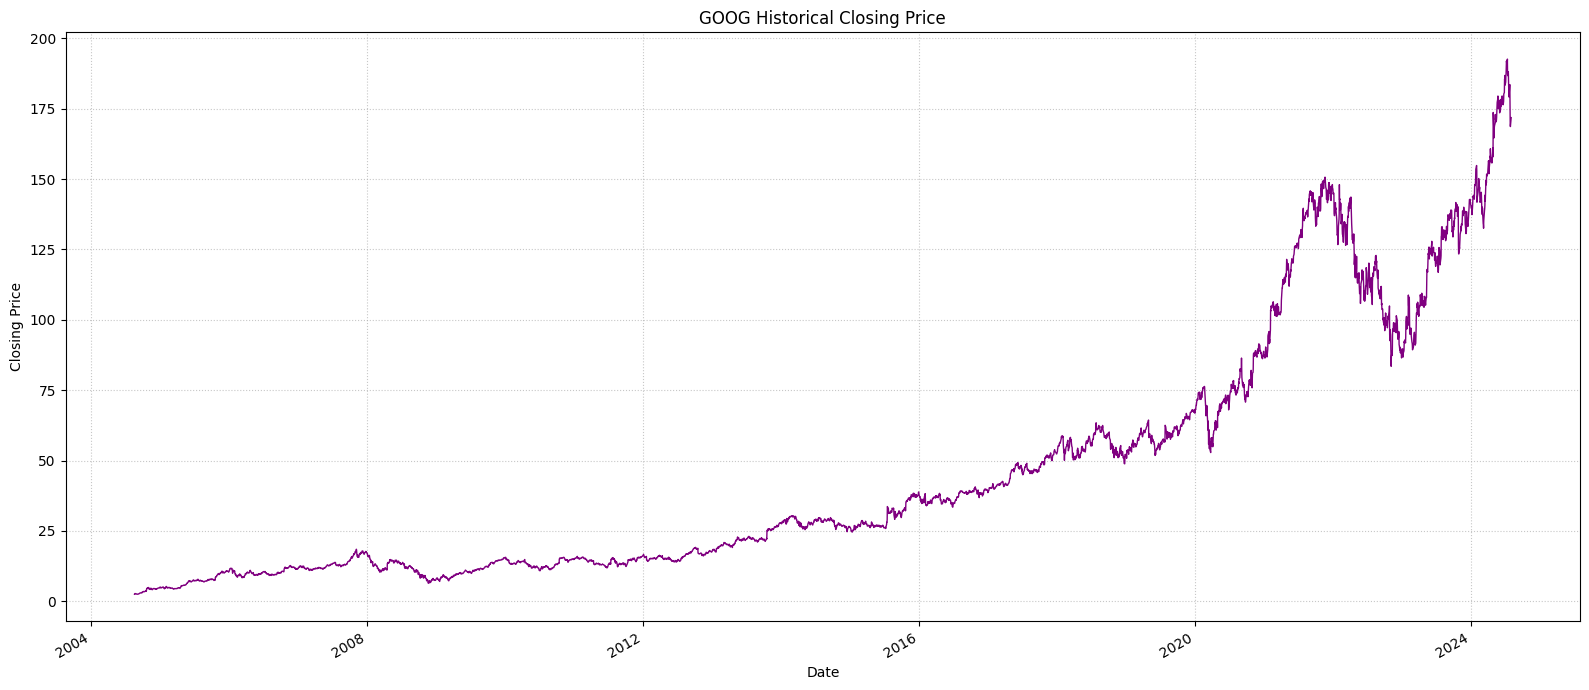

Saved: GOOG_closing_price.png

Plotting GOOG Daily Trading Volume...


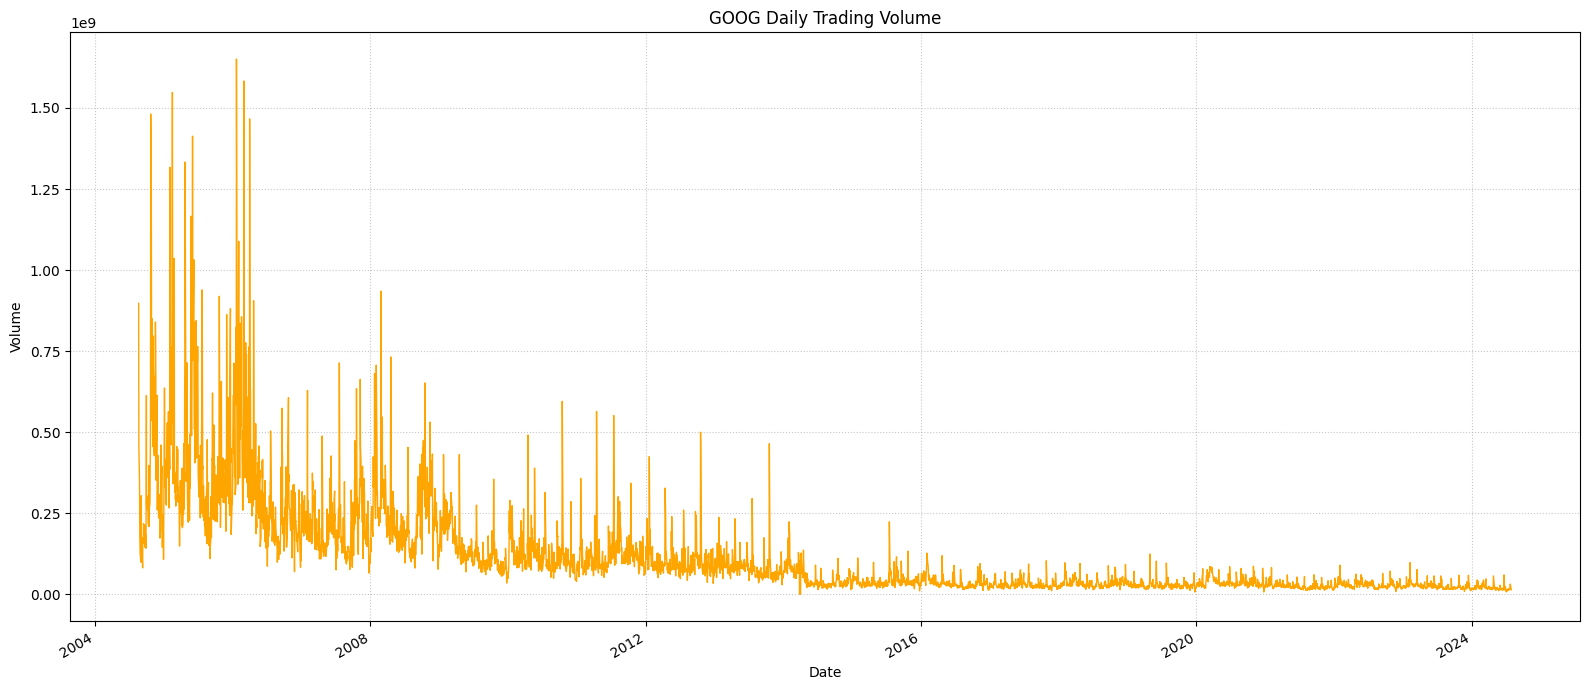

Saved: GOOG_trading_volume.png

### GOOG Daily Returns Statistics:
count    5019.000000
mean        0.001029
std         0.019318
min        -0.116091
25%        -0.007854
50%         0.000802
75%         0.010138
max         0.199915
Name: Daily_Return, dtype: float64

Plotting GOOG Daily Returns...


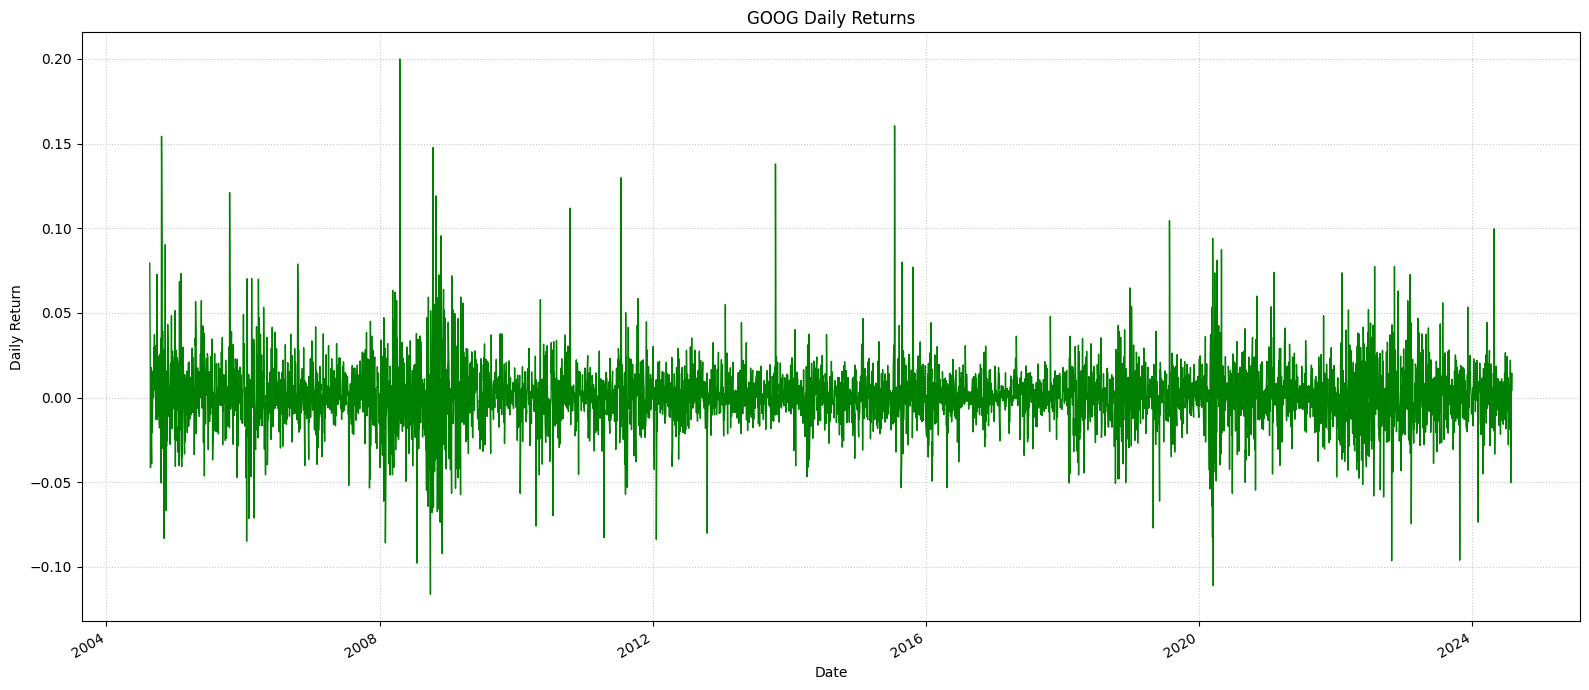

Saved: GOOG_daily_returns.png

## Analyzing META Stock Data
### META Data Descriptive Statistics:
              Open         High          Low        Close    Adj Close        Volume    Dividends  Stock Splits
count  2926.000000  2926.000000  2926.000000  2926.000000  2926.000000  2.926000e+03  2926.000000        2926.0
mean    179.557215   181.875331   177.317761   179.649453   179.305921  2.872083e+07     0.000342           0.0
std     108.864895   110.256219   107.511134   108.906971   108.755055  2.269811e+07     0.013070           0.0
min      22.990000    23.090000    22.670000    22.900000    22.853037  5.467500e+06     0.000000           0.0
25%      97.767502    98.772499    95.889997    97.382498    97.182795  1.571308e+07     0.000000           0.0
50%     166.870003   168.850006   164.210007   166.855003   166.512825  2.176100e+07     0.000000           0.0
75%     231.450005   234.934998   228.687504   232.424999   231.948360  3.294468e+07     0.000000           0.0
max   

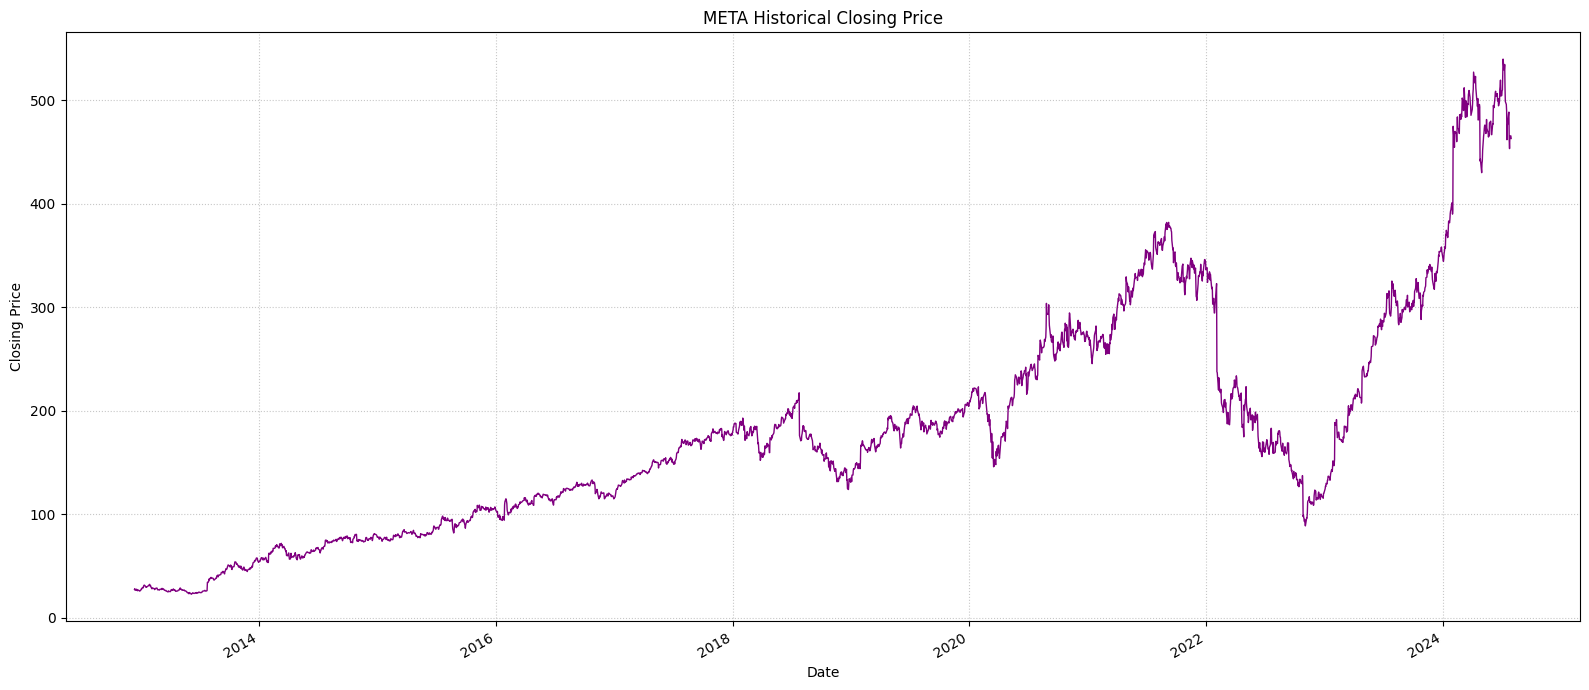

Saved: META_closing_price.png

Plotting META Daily Trading Volume...


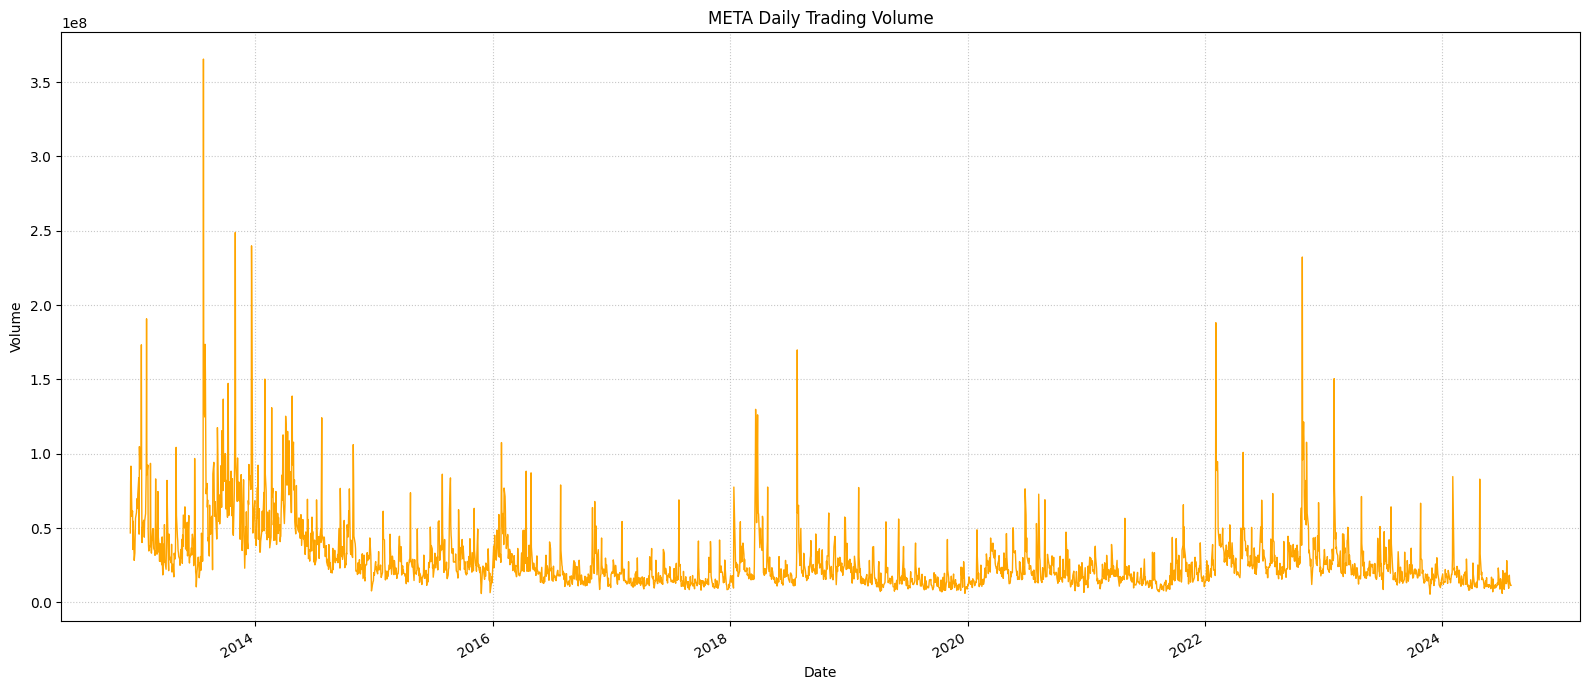

Saved: META_trading_volume.png

### META Daily Returns Statistics:
count    2925.000000
mean        0.001260
std         0.024277
min        -0.263901
25%        -0.009598
50%         0.001085
75%         0.012652
max         0.296115
Name: Daily_Return, dtype: float64

Plotting META Daily Returns...


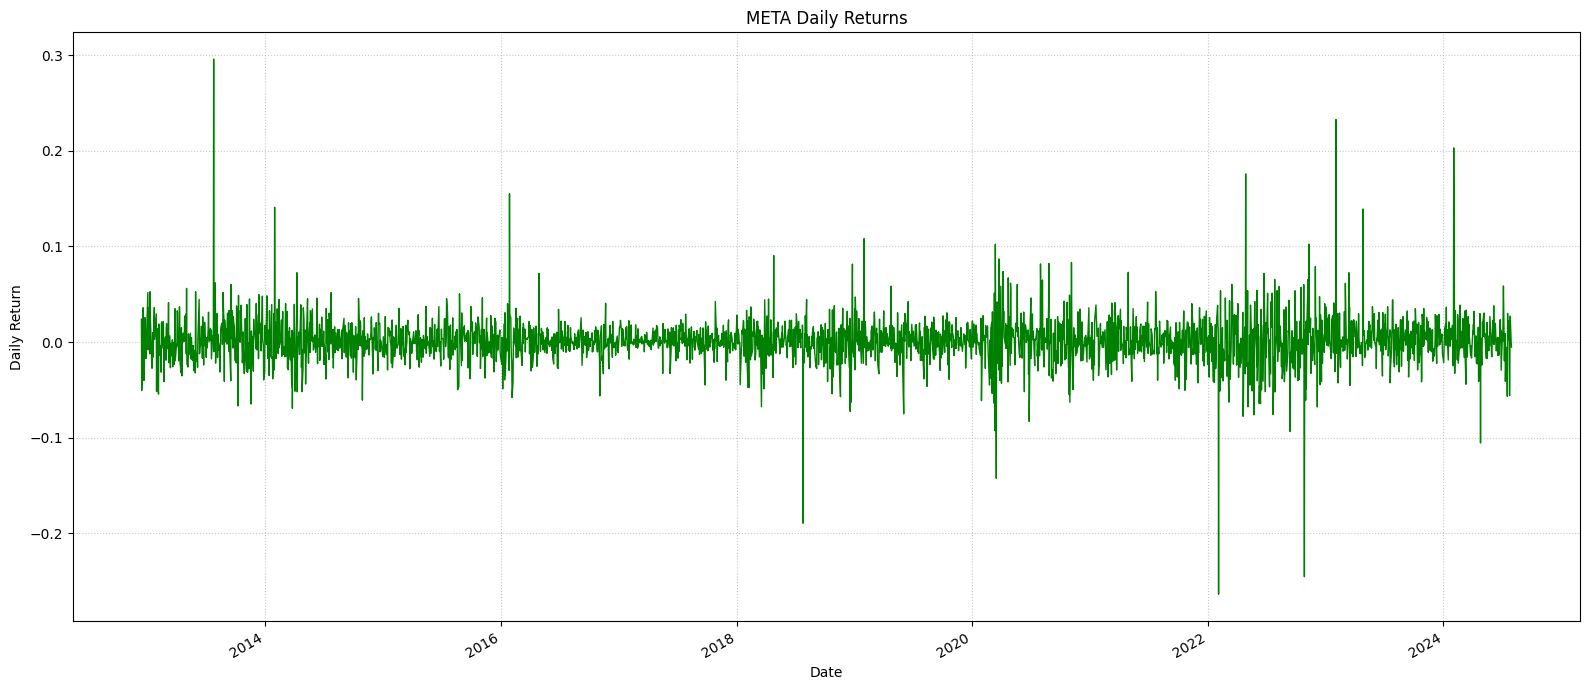

Saved: META_daily_returns.png

## Analyzing NVDA Stock Data
### NVDA Data Descriptive Statistics:
              Open         High          Low        Close    Adj Close        Volume    Dividends  Stock Splits
count  6421.000000  6421.000000  6421.000000  6421.000000  6421.000000  6.421000e+03  6421.000000   6421.000000
mean      6.207884     6.320466     6.085095     6.207702     6.181334  6.060791e+08     0.000025      0.003348
std      16.138328    16.424862    15.794914    16.118517    16.121352  4.323482e+08     0.000316      0.142397
min       0.034896     0.035547     0.033333     0.034115     0.031291  1.968000e+07     0.000000      0.000000
25%       0.277500     0.286250     0.269500     0.276750     0.253843  3.456350e+08     0.000000      0.000000
50%       0.457250     0.464750     0.450750     0.457000     0.427637  5.070000e+08     0.000000      0.000000
75%       4.182500     4.235750     4.116500     4.175000     4.130434  7.362000e+08     0.000000      0.000000
max   

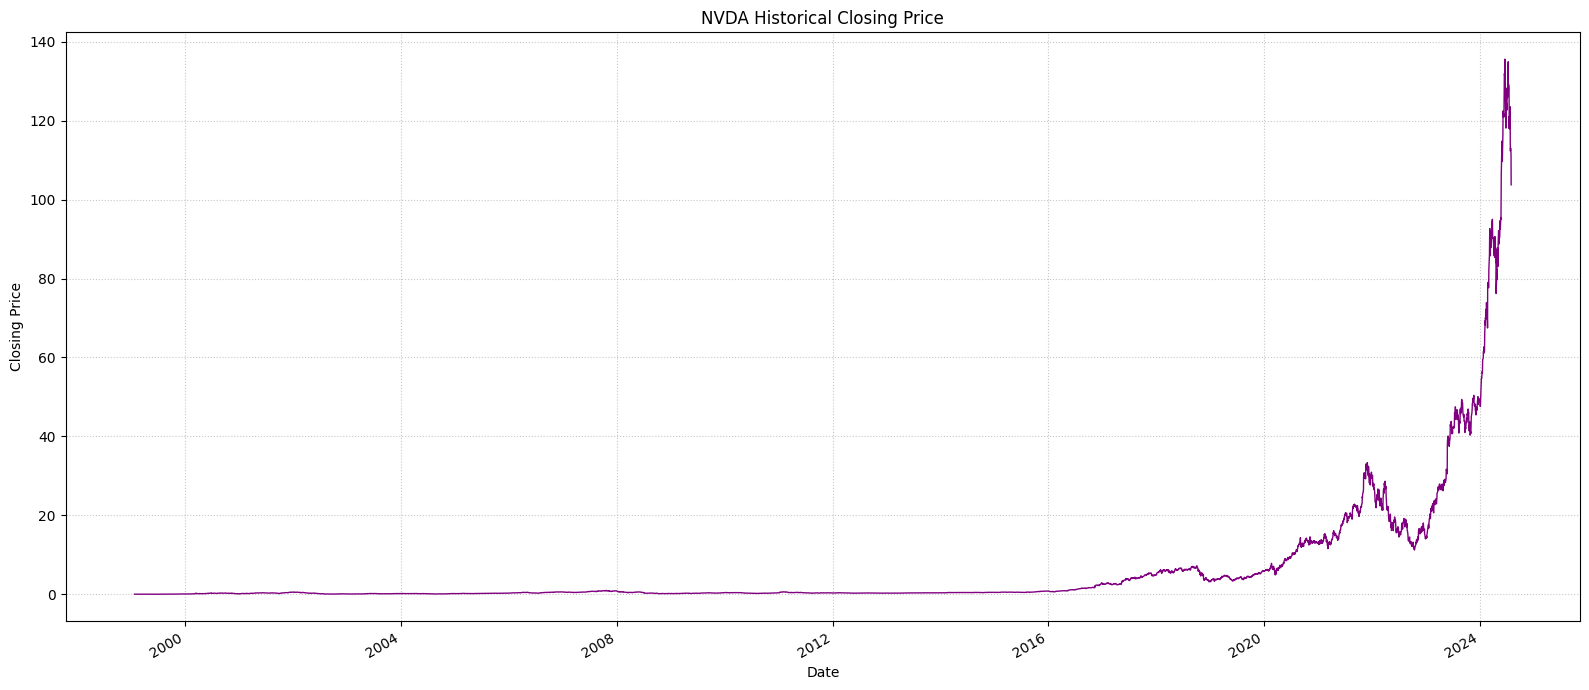

Saved: NVDA_closing_price.png

Plotting NVDA Daily Trading Volume...


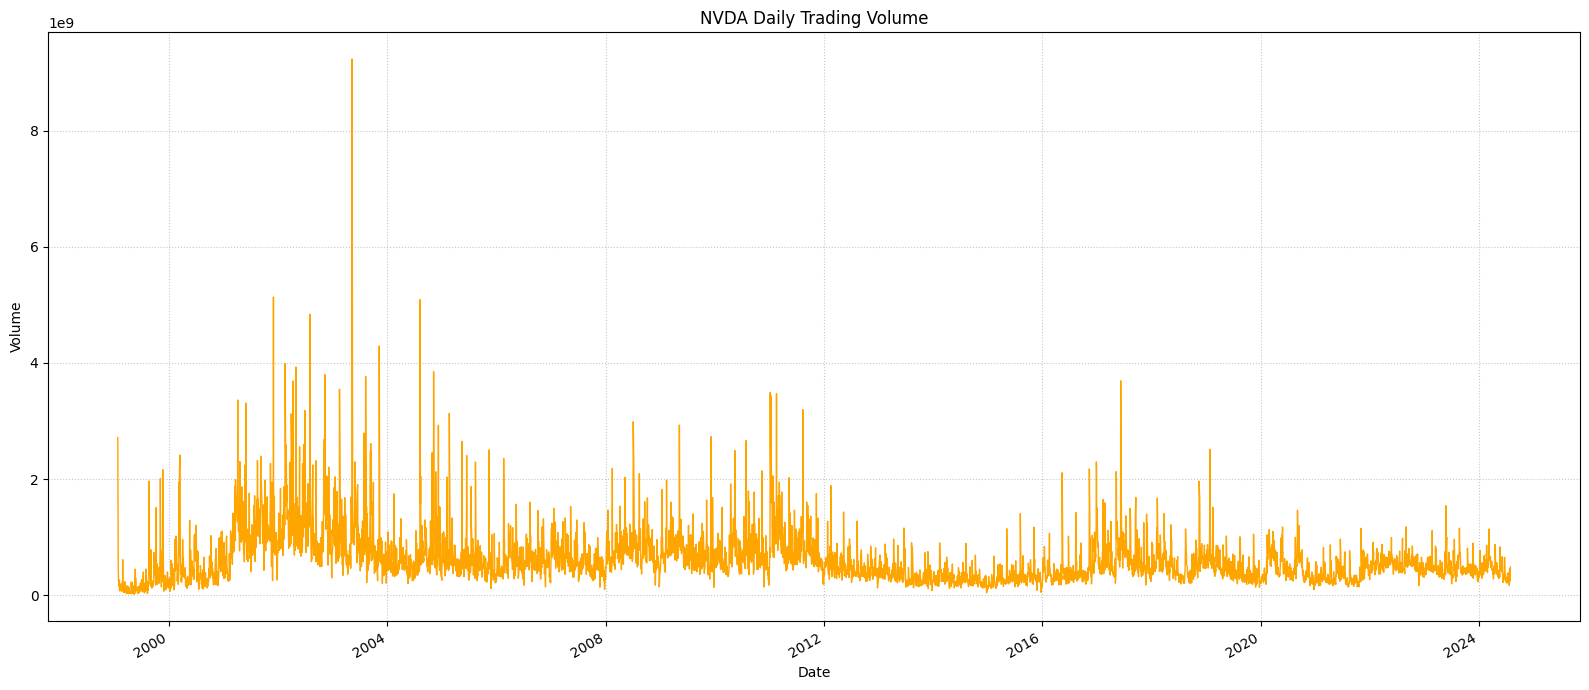

Saved: NVDA_trading_volume.png

### NVDA Daily Returns Statistics:
count    6420.000000
mean        0.001946
std         0.037864
min        -0.352336
25%        -0.016249
50%         0.001252
75%         0.018227
max         0.424147
Name: Daily_Return, dtype: float64

Plotting NVDA Daily Returns...


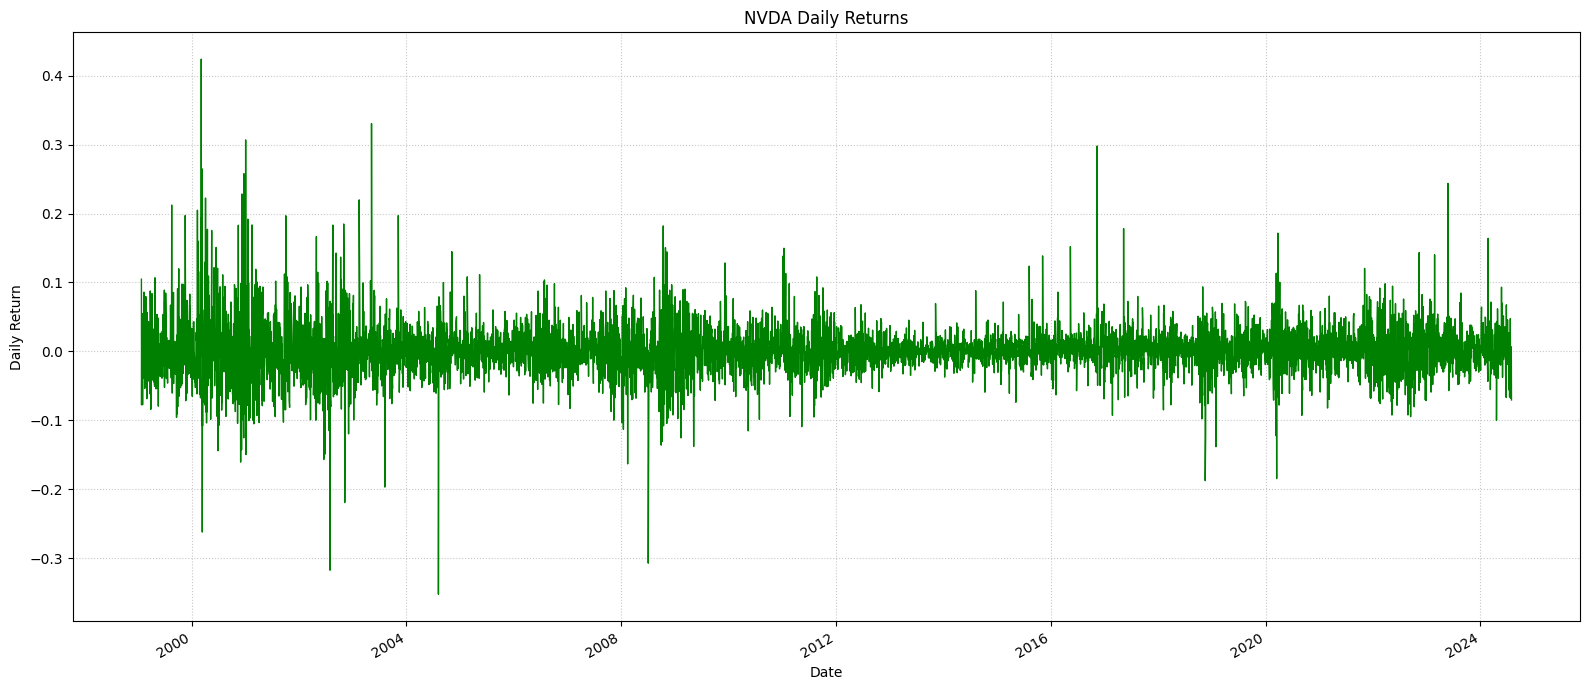

Saved: NVDA_daily_returns.png

## Analyzing TSLA Stock Data
### TSLA Data Descriptive Statistics:
              Open         High          Low        Close    Adj Close        Volume  Dividends  Stock Splits
count  3545.000000  3545.000000  3545.000000  3545.000000  3545.000000  3.545000e+03     3545.0   3545.000000
mean     75.505658    77.159237    73.743492    75.487264    75.487264  9.699708e+07        0.0      0.002257
std     102.530489   104.806516   100.051787   102.456615   102.456615  7.866828e+07        0.0      0.097921
min       1.076000     1.108667     0.998667     1.053333     1.053333  1.777500e+06        0.0      0.000000
25%      11.516667    11.861333    11.216667    11.565333    11.565333  4.770600e+07        0.0      0.000000
50%      17.463333    17.688667    17.100000    17.459333    17.459333  8.250600e+07        0.0      0.000000
75%     161.880005   165.333328   158.360001   161.479996   161.479996  1.228890e+08        0.0      0.000000
max     411.470001   4

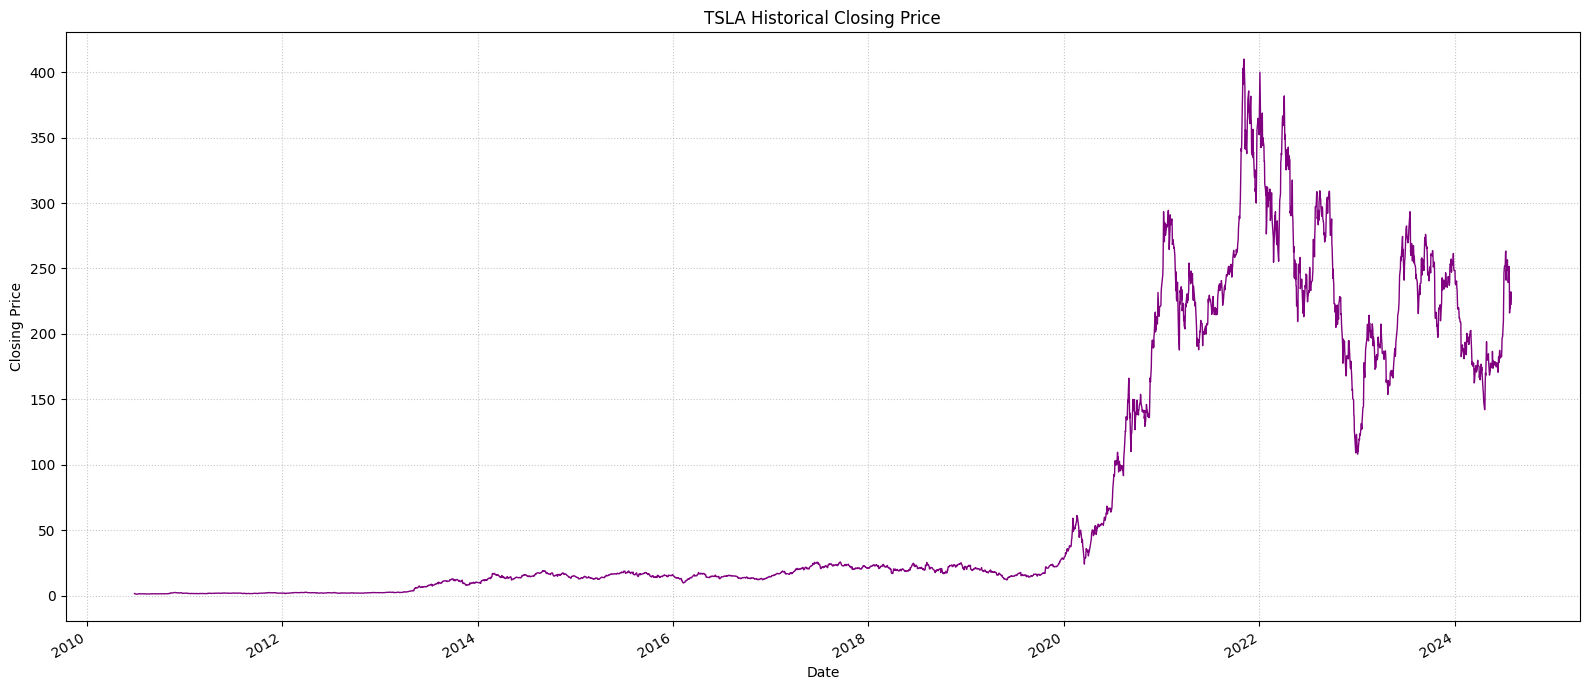

Saved: TSLA_closing_price.png

Plotting TSLA Daily Trading Volume...


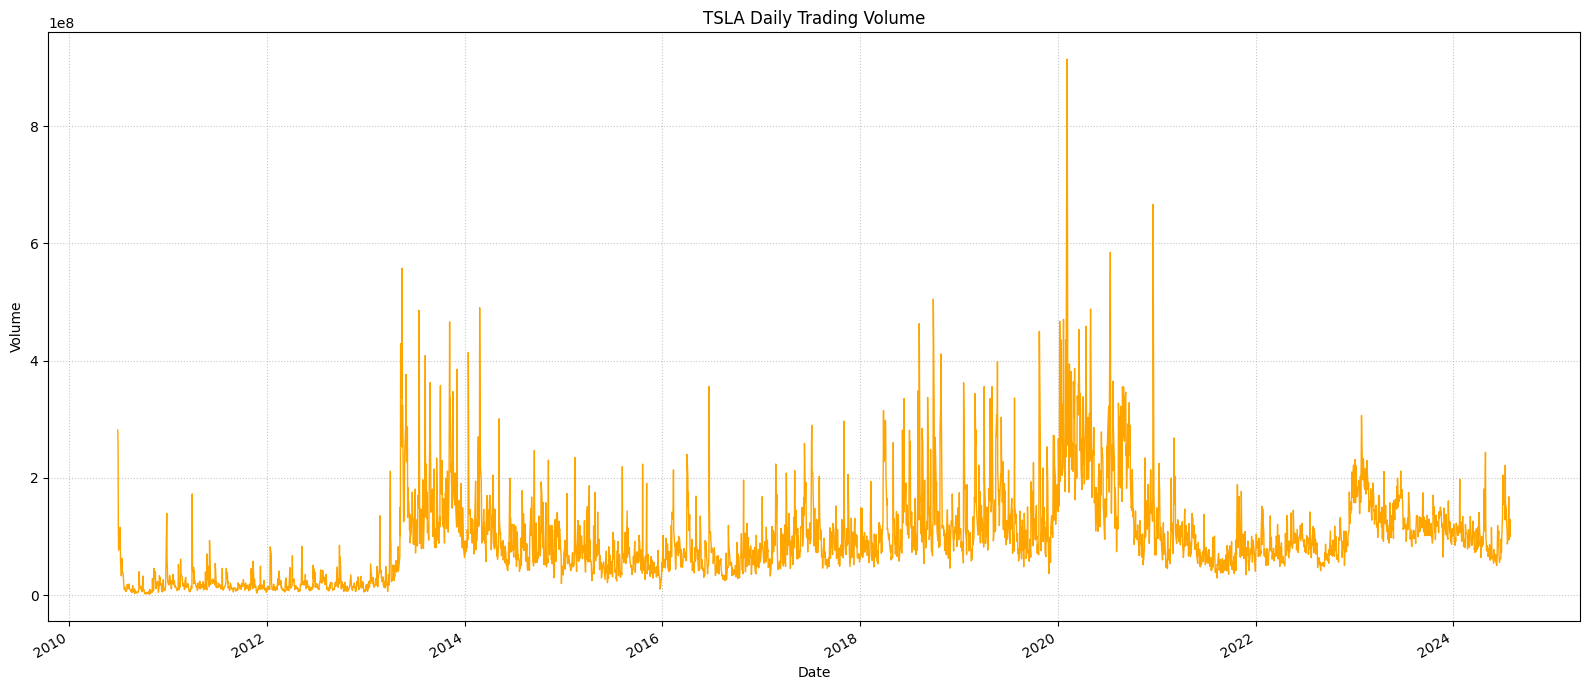

Saved: TSLA_trading_volume.png

### TSLA Daily Returns Statistics:
count    3544.000000
mean        0.002035
std         0.035871
min        -0.210628
25%        -0.016076
50%         0.001223
75%         0.019257
max         0.243951
Name: Daily_Return, dtype: float64

Plotting TSLA Daily Returns...


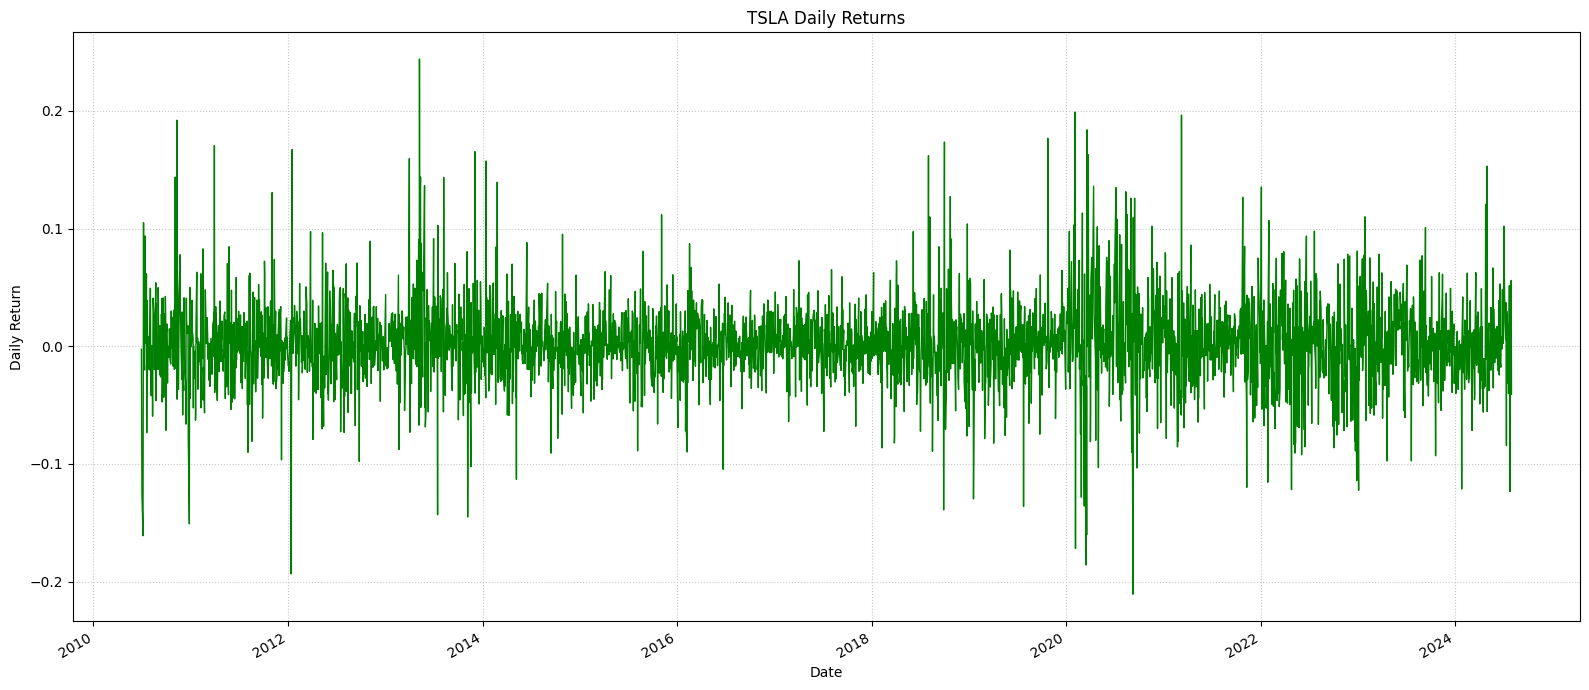

Saved: TSLA_daily_returns.png

--- All EDA tasks complete! ---


In [33]:

print("\n--- Stock Data Analysis for All Tickers ---")
if all_stock_dfs:
    for ticker, stock_df in all_stock_dfs.items():
        print(f"\n## Analyzing {ticker} Stock Data")
        print(f"### {ticker} Data Descriptive Statistics:")
        print(stock_df.describe())

        ### Plot Historical Closing Price
        print(f"\nPlotting {ticker} Historical Closing Price...")
        plt.figure(figsize=(16, 7)) # Increased figure size
        stock_df['Close'].plot(title=f'{ticker} Historical Closing Price', color='purple', linewidth=1)
        plt.xlabel('Date')
        plt.ylabel('Closing Price')
        plt.grid(True, linestyle=':', alpha=0.7)
        plt.tight_layout()
        plt.savefig(os.path.join(EDA_OUTPUT_DIR, f'{ticker}_closing_price.png'))
        plt.show()
        print(f"Saved: {ticker}_closing_price.png")

        ### Plot Daily Volume
        print(f"\nPlotting {ticker} Daily Trading Volume...")
        plt.figure(figsize=(16, 7)) # Increased figure size
        stock_df['Volume'].plot(title=f'{ticker} Daily Trading Volume', color='orange', linewidth=1)
        plt.xlabel('Date')
        plt.ylabel('Volume')
        plt.grid(True, linestyle=':', alpha=0.7)
        plt.tight_layout()
        plt.savefig(os.path.join(EDA_OUTPUT_DIR, f'{ticker}_trading_volume.png'))
        plt.show()
        print(f"Saved: {ticker}_trading_volume.png")

        ### Calculate and Plot Daily Returns
        stock_df['Daily_Return'] = stock_df['Adj Close'].pct_change()
        print(f"\n### {ticker} Daily Returns Statistics:")
        print(stock_df['Daily_Return'].describe())

        print(f"\nPlotting {ticker} Daily Returns...")
        plt.figure(figsize=(16, 7)) # Increased figure size
        stock_df['Daily_Return'].plot(title=f'{ticker} Daily Returns', color='green', linewidth=1)
        plt.xlabel('Date')
        plt.ylabel('Daily Return')
        plt.grid(True, linestyle=':', alpha=0.7)
        plt.tight_layout()
        plt.savefig(os.path.join(EDA_OUTPUT_DIR, f'{ticker}_daily_returns.png'))
        plt.show()
        print(f"Saved: {ticker}_daily_returns.png")
else:
    print("No stock data was loaded. Skipping stock data analysis.")

print("\n--- All EDA tasks complete! ---")